In [66]:
#import all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [176]:
#lets bring the data set
df = pd.read_csv('swiggy_dataset.csv')
df.head(10)

,name,city,avgRating,totalRatingsString,cuisines,cost_for_two_strings,deliveryTime,unserviceable,veg
0,Faasos - Wraps & Rolls,Ahmedabad,4.2,500+ ratings,['Combo' 'Snacks' 'Beverages' 'Desserts' 'Indi...,200,44,False,False
1,Burger King,Ahmedabad,4.2,1000+ ratings,['American' 'Fast Food'],350,33,False,False
2,Mahalaxmi Pav Bhaji,Ahmedabad,4.3,500+ ratings,['North Indian'],200,28,False,True
3,HIIT Meals,Ahmedabad,3.3,Too Few Ratings,['Fast Food' 'Combo' 'Snacks' 'North Indian' '...,150,51,False,False
4,Jay Jalaram Parotha House,Ahmedabad,3.9,100+ ratings,['North Indian'],250,29,False,True
5,Jalaram Parotha House,Ahmedabad,3.9,20+ ratings,['North Indian' 'Gujarati'],450,28,False,True
6,Cake Dengo Cake Shop,Ahmedabad,4.1,100+ ratings,['Desserts'],500,50,False,False
7,The Westend Hotel (Mayflower),Ahmedabad,4.4,100+ ratings,['Indian' 'Chinese'],450,27,False,False
8,Modi Sandwich And Pizza-Paldi,Ahmedabad,3.9,1000+ ratings,['Fast Food' 'Beverages'],250,33,False,True
9,Sugarless Life,Ahmedabad,4.2,100+ ratings,['Desserts' 'Sweets' 'Combo' 'Italian' 'Pizzas...,250,36,False,False


In [68]:
#Lets filter out Delhi City restaraunt
df = df[df['city']=='Delhi']
df.head()

,name,city,avgRating,totalRatingsString,cuisines,cost_for_two_strings,deliveryTime,unserviceable,veg
2771,Wah ji Wah ( budhvihar),Delhi,3.8,1000+ ratings,['Indian' 'Chinese'],250,21,False,False
2772,Wah Bhai Wah,Delhi,3.8,500+ ratings,['North Indian' 'Chinese' 'Tandoor' 'Beverages'],200,27,False,False
2773,Burger King,Delhi,4.3,1000+ ratings,['American' 'Fast Food'],350,35,False,True
2774,Behrouz Biryani,Delhi,4.2,500+ ratings,['Biryani' 'Mughlai' 'Lucknowi' 'Hyderabadi' '...,500,38,False,True
2775,Nivetha Dosa Corner,Delhi,4.1,100+ ratings,['South Indian'],150,31,False,True


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613 entries, 2771 to 3383
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  613 non-null    object 
 1   city                  613 non-null    object 
 2   avgRating             613 non-null    float64
 3   totalRatingsString    613 non-null    object 
 4   cuisines              613 non-null    object 
 5   cost_for_two_strings  613 non-null    int64  
 6   deliveryTime          613 non-null    int64  
 7   unserviceable         613 non-null    bool   
 8   veg                   613 non-null    bool   
dtypes: bool(2), float64(1), int64(2), object(4)
memory usage: 29.9+ KB


In [70]:
#Lets check null values
df.isnull().sum()

name                    0
city                    0
avgRating               0
totalRatingsString      0
cuisines                0
cost_for_two_strings    0
deliveryTime            0
unserviceable           0
veg                     0
dtype: int64

In [71]:
#no:of restaurants in delhi
df.shape

(613, 9)

In [72]:
df.describe()

,avgRating,cost_for_two_strings,deliveryTime
count,613.000000,613.000000,613.000000
mean,3.702121,333.029364,50.792822
std,0.436241,187.412975,13.071116
min,2.700000,20.000000,21.000000
25%,3.300000,200.000000,40.000000
50%,3.600000,300.000000,49.000000
75%,4.100000,400.000000,60.000000
max,5.000000,1650.000000,79.000000


In [73]:
#check the top 5 rated restaraunts
top_rate = df['avgRating'].nlargest(5)
top_rate.reset_index()

,index,avgRating
0,3274,5.0
1,2933,4.8
2,2949,4.8
3,3065,4.8
4,3096,4.7


In [74]:
#creating a pivot table for restaurants with top rating
a = pd.pivot_table(df,'avgRating',index='name')
result = a.sort_values('avgRating',ascending=False).head(10)
result

,avgRating
name,
Fat Tiger,5.0
Pizza Paradise By VHC,4.8
The Sugar Free Keto Kafe - By Artinci,4.8
Biryani By Kilo,4.8
Shake'n Food,4.7
WOK ON FIRE,4.7
Lakhan Pan,4.6
THE DINEROOM,4.6
Keventers Ice Creamery,4.6


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Fat Tiger'),
  Text(1, 0, 'Pizza Paradise By VHC'),
  Text(2, 0, 'The Sugar Free Keto Kafe - By Artinci'),
  Text(3, 0, 'Biryani By Kilo'),
  Text(4, 0, "Shake'n Food"),
  Text(5, 0, 'WOK ON FIRE'),
  Text(6, 0, 'Lakhan Pan'),
  Text(7, 0, 'THE DINEROOM'),
  Text(8, 0, 'Keventers Ice Creamery'),
  Text(9, 0, 'Havmor Havfunn Ice Cream')])

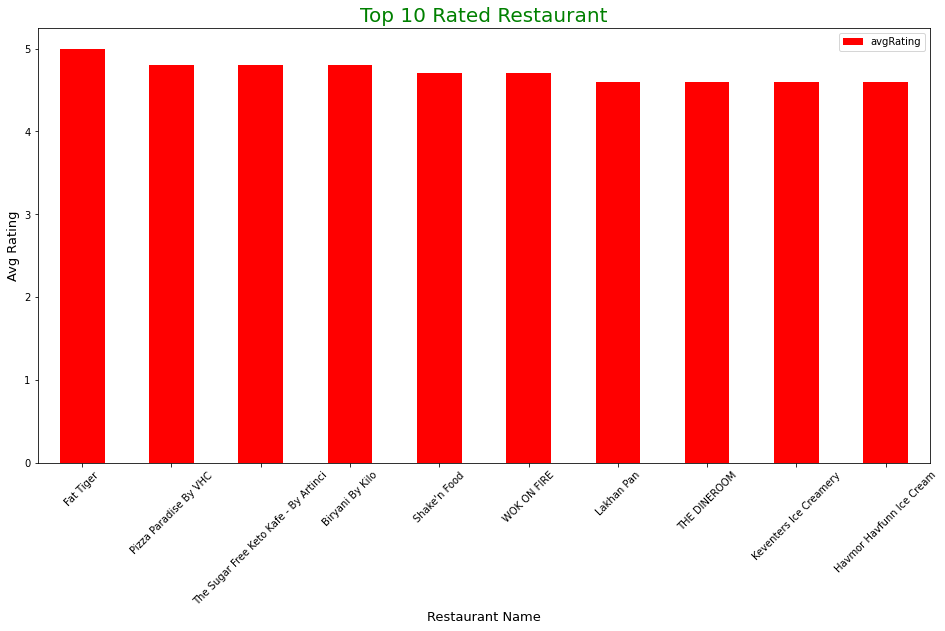

In [75]:
result.plot(kind='bar',figsize=(16,8),color='red')
plt.xlabel('Restaurant Name',fontsize=13)
plt.ylabel('Avg Rating',fontsize=13)
plt.title('Top 10 Rated Restaurant',color='green',fontsize=20)
plt.xticks(rotation=45)


In [76]:
#Top 10 cuisines with count
cuisines = df['cuisines'].value_counts().head(10)
cuisines.reset_index()

,index,cuisines
0,['North Indian'],47
1,['Indian'],27
2,['Chinese'],17
3,['North Indian' 'Chinese'],13
4,['Fast Food'],10
5,['Chinese' 'Indian'],7
6,['Snacks'],7
7,['Indian' 'Chinese'],7
8,['Desserts'],7
9,['Bakery'],7


Text(0, 0.5, 'Count')

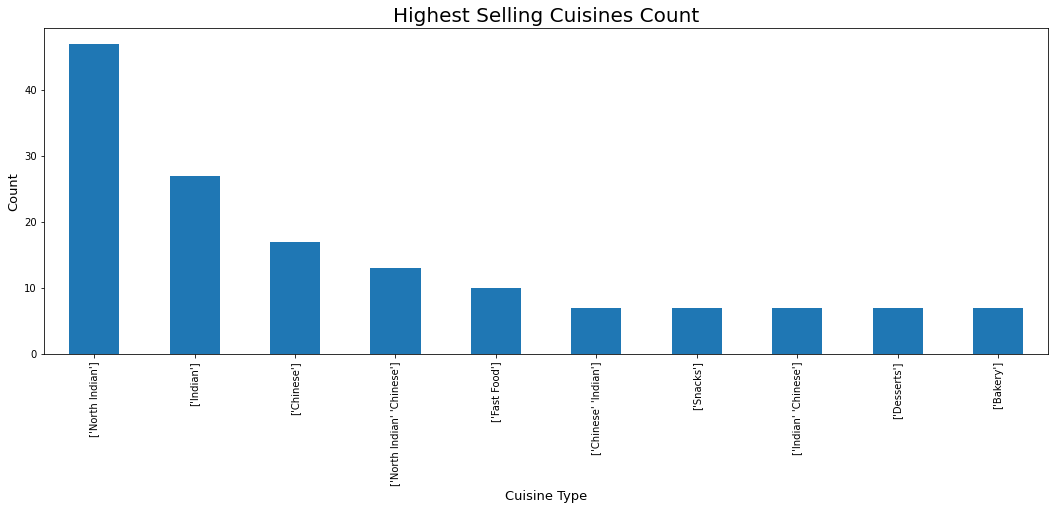

In [123]:
#presentation of cuisines count
cuisines.plot(kind='bar',figsize=(18,6))
plt.title('Highest Selling Cuisines Count',fontsize=20)
plt.xlabel('Cuisine Type',fontsize=13)
plt.ylabel('Count',fontsize=13)

In [77]:
#cuisines with highest rating
b = pd.pivot_table(df,'avgRating',index='cuisines')
result = b.sort_values('avgRating',ascending=False).head(5)
result

,avgRating
cuisines,
['Pizzas' 'Chinese' 'Snacks' 'Beverages' 'American'],5.0
['Healthy Food' 'Keto' 'Desserts' 'Ice Cream' 'Snacks' 'Beverages' 'Bakery'],4.8
['Biryani' 'Mughlai' 'Kebabs' 'North Indian' 'Hyderabadi' 'Lucknowi' 'Andhra' 'South Indian'],4.8
['Pizzas' 'Beverages' 'Italian' 'Continental' 'Biryani' 'Desserts' 'Combo'],4.8
['Chinese' 'Thai' 'Asian'],4.7


Text(0.5, 0, 'Type Of Cuisine')

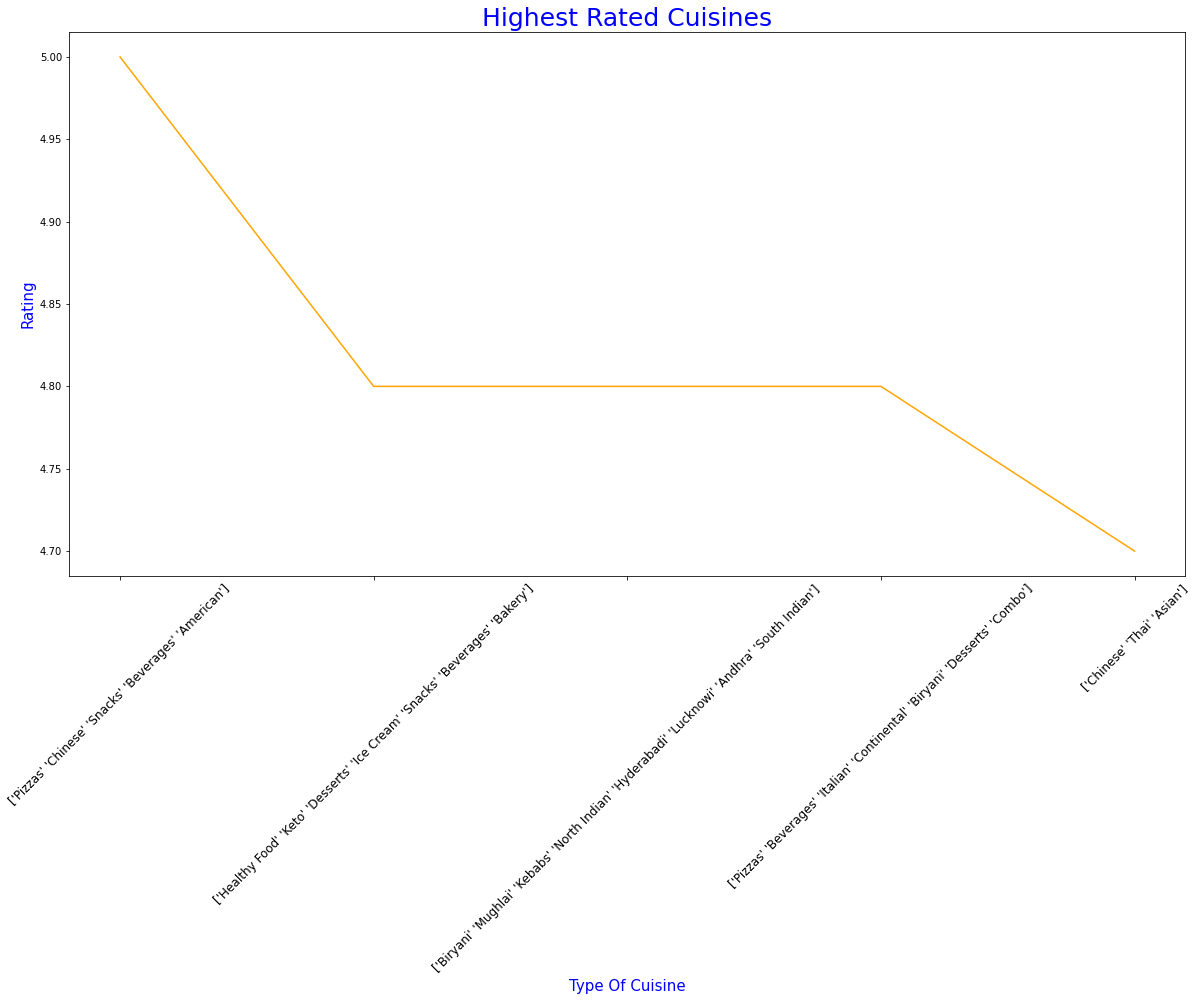

In [118]:
#presentation of above data 
plt.figure(figsize=(20,10))
sns.lineplot(data=result, x='cuisines',y='avgRating',color='orange')
plt.title('Highest Rated Cuisines',fontsize=25,color='blue')
plt.xticks(rotation=45,fontsize=12)
plt.ylabel('Rating',fontsize=15,color='blue')
plt.xlabel('Type Of Cuisine',fontsize=15,color='blue')

In [89]:
time = df[df['deliveryTime']<30].sort_values('deliveryTime',ascending=False).head(10)
time.reset_index()

,index,name,city,avgRating,totalRatingsString,cuisines,cost_for_two_strings,deliveryTime,unserviceable,veg
0,2777,Kwality Walls Frozen Dessert & Ice Cream Shop,Delhi,4.6,500+ ratings,['Desserts' 'Ice Cream'],100,29,False,False
1,2778,Kushal Bhojnalaya,Delhi,4.2,100+ ratings,['North Indian'],200,29,False,False
2,2779,Your's Pizza,Delhi,3.5,100+ ratings,['Italian'],400,29,False,False
3,2790,Veerji Malai Chaap Wale (Rohini),Delhi,3.8,500+ ratings,['North Indian' 'Snacks'],400,28,False,True
4,2792,Cake Studio-100% Veg,Delhi,3.8,100+ ratings,['Bakery' 'Chinese' 'Snacks' 'Desserts'],99,28,False,False
5,2796,Guruh Cakes (100% veg),Delhi,3.7,100+ ratings,['Bakery' 'Desserts' 'Fast Food' 'Chinese' 'Sn...,150,28,False,False
6,2978,Shree Ram Paratha wala,Delhi,3.3,Too Few Ratings,['North Indian' 'Indian' 'Snacks'],150,28,False,False
7,2979,Jay Mata ji home kitchen,Delhi,3.3,Too Few Ratings,['South Indian'],200,28,False,False
8,2772,Wah Bhai Wah,Delhi,3.8,500+ ratings,['North Indian' 'Chinese' 'Tandoor' 'Beverages'],200,27,False,False
9,2776,Pizzallo Hot,Delhi,3.0,20+ ratings,['Italian' 'Pizzas'],400,27,False,True


In [103]:
#Lets create a new variable, for restaraunts with least delivery time
d = time.groupby(['name','avgRating','deliveryTime'])['deliveryTime'].count()
d

name                                           avgRating  deliveryTime
Cake Studio-100% Veg                           3.8        28              1
Guruh Cakes (100% veg)                         3.7        28              1
Jay Mata ji home kitchen                       3.3        28              1
Kushal Bhojnalaya                              4.2        29              1
Kwality Walls Frozen Dessert & Ice Cream Shop  4.6        29              1
Pizzallo Hot                                   3.0        27              1
Shree Ram Paratha wala                         3.3        28              1
Veerji Malai Chaap Wale (Rohini)               3.8        28              1
Wah Bhai Wah                                   3.8        27              1
Your's Pizza                                   3.5        29              1
Name: deliveryTime, dtype: int64

Text(0.5, 0, 'Rstaurant Name')

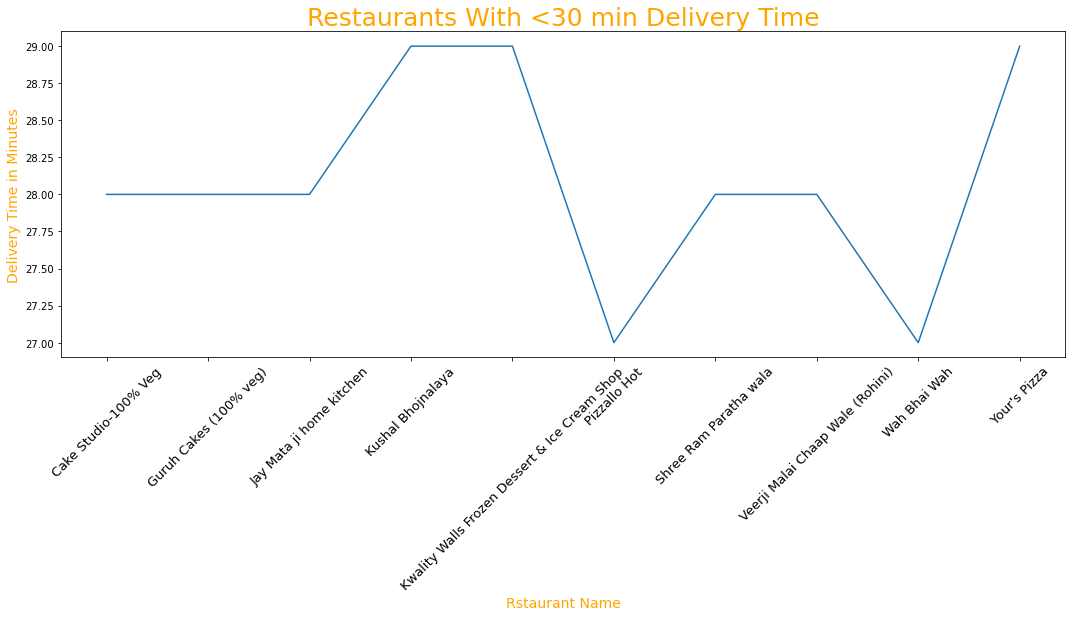

In [116]:
plt.figure(figsize=(18,6))
sns.lineplot(data=d, x='name',y='deliveryTime' )
plt.xticks(rotation=45,fontsize=13)
plt.title('Restaurants With <30 min Delivery Time',color='orange',fontsize=25)
plt.ylabel('Delivery Time in Minutes',fontsize=14,color='orange')
plt.xlabel('Rstaurant Name',fontsize=14,color='orange')

In [129]:
#setting 'name' column as my index in data table
df.set_index("name",inplace=True)

In [151]:
#another variable with cost_for_two_strings >=1000 rs
cost_for_two_strings = df[df['cost_for_two_strings']>=1000].sort_values('cost_for_two_strings',ascending=False).head(10)
cost_for_two_strings.reset_index()

,name,city,avgRating,totalRatingsString,cuisines,cost_for_two_strings,deliveryTime,unserviceable,veg
0,Dine House by Eleven Course,Delhi,3.3,Too Few Ratings,['Chinese' 'North Indian' 'Italian' 'Mexican'],1650,53,False,False
1,Wok in the Clouds,Delhi,4.5,50+ ratings,['North Indian' 'Chinese' 'Thai' 'Continental'],1500,72,False,False
2,Daryaganj - By the inventors of Butter Chicken...,Delhi,4.2,100+ ratings,['Indian' 'North Indian' 'Mughlai' 'Kebabs' 'B...,1200,76,False,True
3,Dimsum Vs Sushi,Delhi,4.0,100+ ratings,['Japanese' 'Pan-Asian' 'Chinese'],1100,71,False,False
4,Mosaic by Crowne Plaza Rohini,Delhi,4.6,20+ ratings,['North Indian' 'Bakery' 'Salads' 'Chinese' 'J...,1000,48,False,False
5,Indi Fork,Delhi,3.3,Too Few Ratings,['North Indian'],1000,70,False,True
6,Sticky Rice,Delhi,4.3,100+ ratings,['Pan-Asian' 'Asian' 'Chinese' 'Japanese' 'Sus...,1000,71,False,False
7,Aioli Bistro,Delhi,4.2,100+ ratings,['Italian' 'Continental' 'Pizzas' 'Salads' 'Pa...,1000,65,False,False
8,Dashi - Dimsum & Sushi Bar,Delhi,4.3,100+ ratings,['Japanese' 'Chinese' 'Pan-Asian' 'Sushi'],1000,65,False,False
9,Cupcakes by Radisson Blu,Delhi,3.3,Too Few Ratings,['Desserts'],1000,61,False,False


In [152]:
e =pd.pivot_table(cost_for_two_strings,'cost_for_two_strings',index='name')
result = e.sort_values('cost_for_two_strings', ascending=False)
result

,cost_for_two_strings
name,
Dine House by Eleven Course,1650
Wok in the Clouds,1500
Daryaganj - By the inventors of Butter Chicken and Dal Makhani,1200
Dimsum Vs Sushi,1100
Aioli Bistro,1000
Cupcakes by Radisson Blu,1000
Dashi - Dimsum & Sushi Bar,1000
Indi Fork,1000
Mosaic by Crowne Plaza Rohini,1000


Text(0, 0.5, 'Cost For Two Strings')

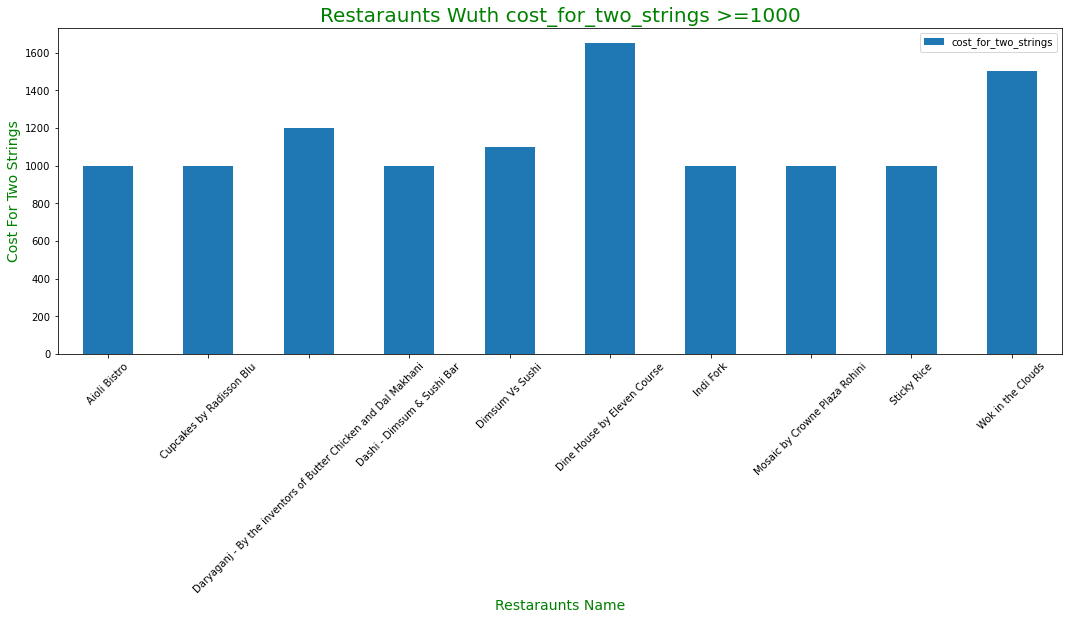

In [155]:
#presentaion of above data
e.plot(kind='bar',figsize=(18,6))
plt.xticks(rotation=45)
plt.title('Restaraunts Wuth cost_for_two_strings >=1000',fontsize=20,color='green')
plt.xlabel('Restaraunts Name',fontsize=14,color='green')
plt.ylabel('Cost For Two Strings',fontsize=14,color='green')

In [172]:
#similarly to 'e', another variable with least cost_for_two_string 
f = pd.pivot_table(df,'cost_for_two_strings',index='name')
result = f.sort_values('cost_for_two_strings', ascending=True).head(10)
result

,cost_for_two_strings
name,
Deem Seem,20
Cake Studio-100% Veg,99
Kishori Lal Paan,100
CHINESE BY NATURE,100
Lakhan Pan,100
Cake@99,100
The Pizza Club,100
Kwality Walls Frozen Dessert & Ice Cream Shop,100
Jain Kulfi (Vikas Jain's),100


Text(0, 0.5, 'Cost For Two Strings')

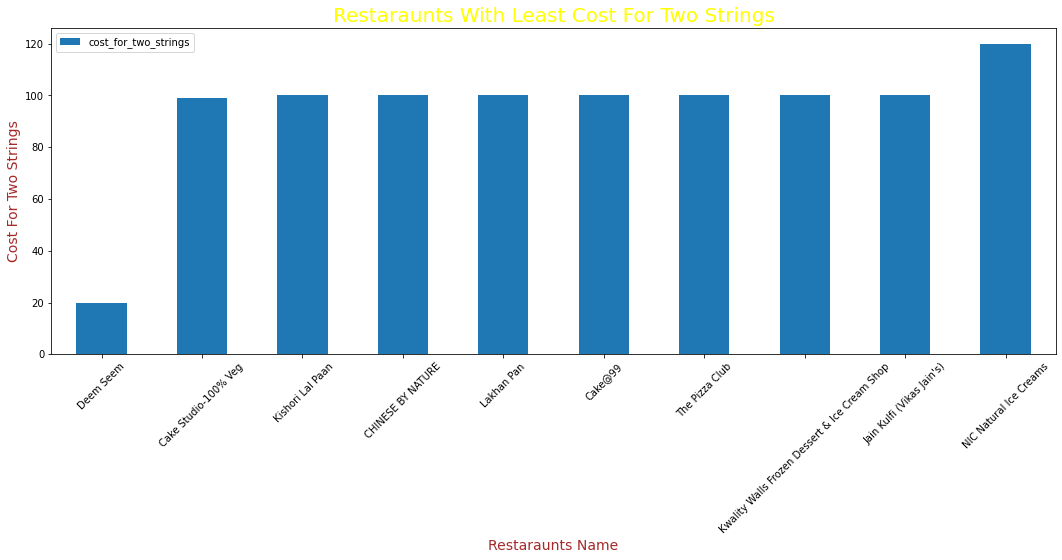

In [177]:
# Presentation of above data
result.plot(kind='bar',figsize=(18,6))
plt.xticks(rotation=45)
plt.title('Restaraunts With Least Cost For Two Strings',fontsize=20,color='yellow')
plt.xlabel('Restaraunts Name',fontsize=14,color='brown')
plt.ylabel('Cost For Two Strings',fontsize=14,color='brown')